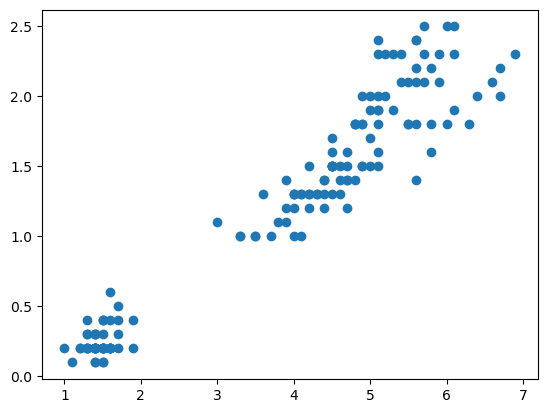

相関係数を出力
[[1.         0.96286543]
 [0.96286543 1.        ]]


In [9]:
import matplotlib.pylab as plt
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target


petal_l = df[:]["petal length (cm)"]
petal_w = df[:]['petal width (cm)']


plt.scatter(petal_l,petal_w)
plt.show()

results = np.corrcoef(petal_l,petal_w)
print('相関係数を出力')
print(results)


In [8]:
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 4 ML


In [13]:
# pip install pandas-profiling


データの概要を確認するために、以下の情報をpandas-profilingで生成する。

    欠損値の有無と割合

    データ型

    ユニークな値の数
    
    数値データの要約統計量（平均、中央値、最小値、最大値、標準偏差など）
    
    カテゴリデータの要約統計量（出現頻度、最頻値など）
    
    相関係数行列

    
データの詳細な分析のために、以下の情報をpandas-profilingで生成する。

    数値データのヒストグラムとカーネル密度推定グラフ

    数値データの箱ひげ図

    カテゴリデータのバー・チャート

    相関係数のヒートマップ


データの品質を確認するために、以下の情報をpandas-profilingで生成する。
    
    数値データの外れ値検出
    
    カテゴリデータの項目間の共起関係のチェック
    
    相関関係の高い項目のチェック


生成されたレポートを確認し、データの特徴や問題点を洞察する。


必要に応じて、前処理や特徴量エンジニアリングを行い、データを洗練する。


モデルの構築・評価を行う。


In [14]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
# pip install graphviz


In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = iris.data[:, 2:]
Y = iris.target

x_train,x_test, y_train,y_test = train_test_split(X ,Y ,train_size=100)


tree_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy")
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

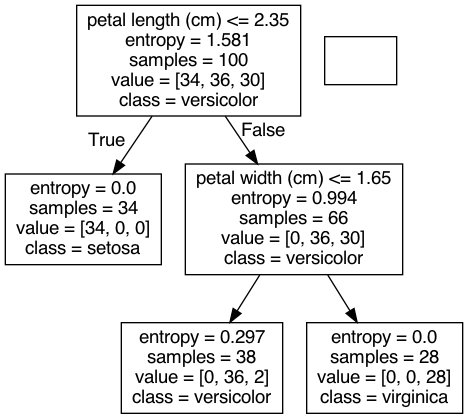

In [35]:
from io import StringIO
import graphviz
import pydotplus
from IPython import display
from sklearn import tree


g = StringIO()
tree.export_graphviz(
    tree_clf,
    out_file = g,
    feature_names = iris.feature_names[2:],
    class_names= iris.target_names
)


graph = pydotplus.graph_from_dot_data(g.getvalue())
display.display(display.Image(graph.create_png()))

In [37]:
score = tree_clf.score(x_test,y_test)
print('正答率：',score)

正答率： 0.92


In [41]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


# irisデータセットを読み込む
iris = load_iris()

# 決定木を作成する
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(iris.data, iris.target)

# 決定木を可視化するためのDOT言語のコードを生成する
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# DOT言語のコードをgraphvizで読み込んでグラフを描画する
graph = graphviz.Source(dot_data)
graph.render('iris_decision_tree', format='png')
graph

ValueError: Length of feature_names, 4 does not match number of features, 2

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = iris.data[:, 2:]
Y = iris.target

x_train,x_test, y_train,y_test = train_test_split(X ,Y ,train_size=100)



gini_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
gini_clf.fit(x_test,y_test)


score = tree_clf.score(x_test,y_test)
print('正答率：',score)

正答率： 0.96
